In [159]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
url = 'https://raw.githubusercontent.com/Nishantarya80/data/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
Data = pd.read_csv(url)

In [161]:
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [162]:
Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [163]:
Data=Data.drop(['customerID','gender'], axis=1)


In [164]:
Data.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [165]:
Data['TotalCharges'] = Data["TotalCharges"].replace(" ",np.nan)

#removing null rows
Data = Data[Data["TotalCharges"].notnull()]
Data = Data.reset_index()[Data.columns]

In [166]:
Data["TotalCharges"] = Data["TotalCharges"].astype(float, copy=True)

#replace No internet service
Data['OnlineSecurity']  = Data['OnlineSecurity'].replace({'No internet service' : 'No'}) 
Data['OnlineBackup']  = Data['OnlineBackup'].replace({'No internet service' : 'No'}) 
Data['DeviceProtection']  = Data['DeviceProtection'].replace({'No internet service' : 'No'}) 
Data['TechSupport']  = Data['TechSupport'].replace({'No internet service' : 'No'}) 
Data['StreamingTV']  = Data['StreamingTV'].replace({'No internet service' : 'No'}) 
Data['StreamingMovies']  = Data['StreamingMovies'].replace({'No internet service' : 'No'}) 
Data['MultipleLines']  = Data['MultipleLines'].replace({'No phone service' : 'No'}) 

In [167]:
Data.nunique()

SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [168]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [169]:
import pickle
pickle.dump(le, open('labelencoder.pkl', 'wb'))


In [170]:

dfle = Data

dfle.Partner = le.fit_transform(dfle.Partner)
dfle.Dependents = le.fit_transform(dfle.Dependents)
dfle.PhoneService = le.fit_transform(dfle.PhoneService)
dfle.MultipleLines = le.fit_transform(dfle.MultipleLines)
dfle.InternetService = le.fit_transform(dfle.InternetService)
dfle.OnlineSecurity = le.fit_transform(dfle.OnlineSecurity)
dfle.OnlineBackup = le.fit_transform(dfle.OnlineBackup)
dfle.DeviceProtection = le.fit_transform(dfle.DeviceProtection)
dfle.TechSupport = le.fit_transform(dfle.TechSupport)
dfle.StreamingTV = le.fit_transform(dfle.StreamingTV)
dfle.StreamingMovies = le.fit_transform(dfle.StreamingMovies)
dfle.Contract = le.fit_transform(dfle.Contract)
dfle.PaperlessBilling = le.fit_transform(dfle.PaperlessBilling)
dfle.PaymentMethod = le.fit_transform(dfle.PaymentMethod)
dfle.Churn = le.fit_transform(dfle.Churn)



In [171]:
dfle

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7028,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7029,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7030,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


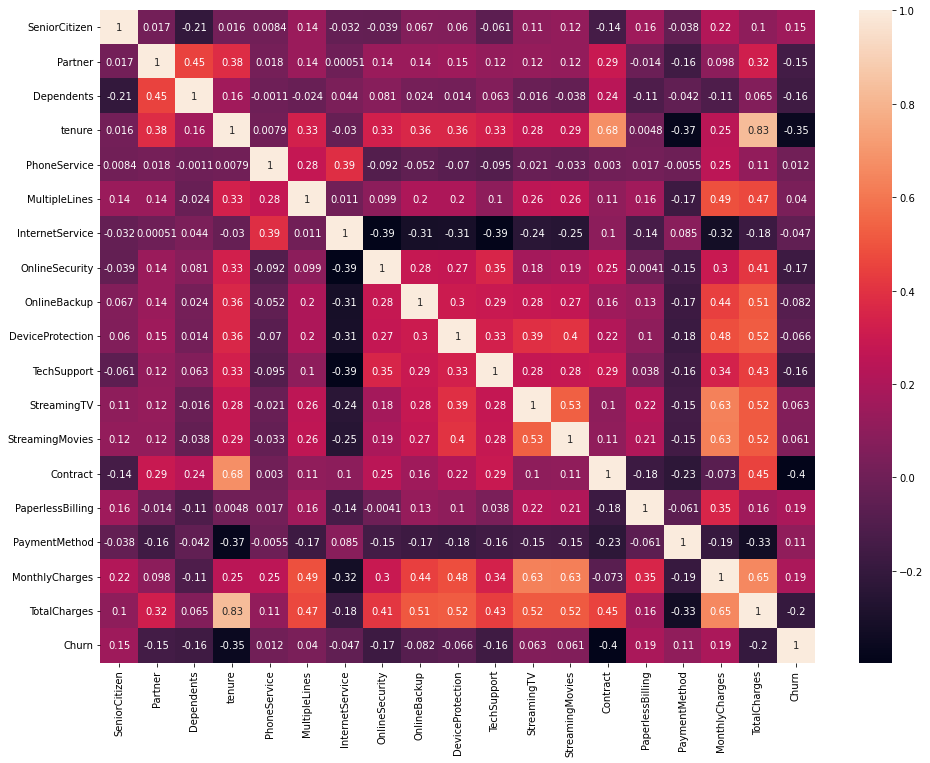

In [172]:
plt.figure(figsize=(16,12))
sns.heatmap(dfle.corr(), annot=True)

In [173]:
X= dfle.drop(['Churn'],axis=1)
y=dfle['Churn']

In [174]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.44032709,  1.03561683, -0.65230493, ...,  0.39980518,
        -1.16169394, -0.99419409],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  1.33663626,
        -0.26087792, -0.17373982],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  1.33663626,
        -0.36392329, -0.95964911],
       ...,
       [-0.44032709,  1.03561683,  1.53302536, ...,  0.39980518,
        -1.17000405, -0.85451414],
       [ 2.27103902,  1.03561683, -0.65230493, ...,  1.33663626,
         0.31916782, -0.87209546],
       [-0.44032709, -0.9656081 , -0.65230493, ..., -1.47385696,
         1.35793167,  2.01234407]])

In [175]:
import pickle
pickle.dump(sc, open('standardscaler.pkl', 'wb'))

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Sequential model
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [177]:
from keras import Sequential
from keras.layers import Dense

In [178]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=18))
#Second  Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [179]:
#Compiling the neural network

classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [180]:
#Fitting the data to the training dataset/
classifier.fit(X_train,y_train, batch_size=64, epochs=33,validation_split=0.1)

Epoch 1/33
70/70 [==============================] - 1s 6ms/step - loss: 0.5853 - accuracy: 0.7415 - val_loss: 0.4441 - val_accuracy: 0.8032
Epoch 2/33
70/70 [==============================] - 0s 4ms/step - loss: 0.4376 - accuracy: 0.7830 - val_loss: 0.4107 - val_accuracy: 0.8012
Epoch 3/33
70/70 [==============================] - 0s 4ms/step - loss: 0.4231 - accuracy: 0.7941 - val_loss: 0.3998 - val_accuracy: 0.8073
Epoch 4/33
70/70 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8031 - val_loss: 0.3969 - val_accuracy: 0.8134
Epoch 5/33
70/70 [==============================] - 0s 4ms/step - loss: 0.4138 - accuracy: 0.8020 - val_loss: 0.3953 - val_accuracy: 0.8195
Epoch 6/33
70/70 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8056 - val_loss: 0.3909 - val_accuracy: 0.8235
Epoch 7/33
70/70 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.8061 - val_loss: 0.3884 - val_accuracy: 0.8215
Epoch 8/33
70/70 [==

In [181]:
eval_model=classifier.evaluate(X_test, y_test)
eval_model

66/66 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.7957


[0.43694084882736206, 0.7957345843315125]

In [182]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1400  149]
 [ 282  279]]


In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.56       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.80      0.79      2110



In [185]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier.predict(X_test))

0.8285887393281157

## Accuracy of Sequential model is 0.8285887393281157

#Sklearn Logistic regresssion

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [187]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)
y_le_p = model.predict(X_test)

In [188]:
model.score(X_test,y_test)

0.7971563981042654

In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_le_p))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [190]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_le_p))


[[1383  166]
 [ 262  299]]


In [191]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_le_p)

0.7129054568009491

## Sklearn Logistic regresssion Accuracy 0.7129054



# Sklearn desision tree

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [193]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier()

In [194]:
model2.fit(X_train, y_train)
y_dt_p = model2.predict(X_test)

In [195]:
model2.score(X_test,y_test)

0.7118483412322275

In [196]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_dt_p))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1549
           1       0.46      0.48      0.47       561

    accuracy                           0.71      2110
   macro avg       0.63      0.64      0.64      2110
weighted avg       0.72      0.71      0.71      2110



In [197]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_dt_p))

[[1231  318]
 [ 290  271]]


In [198]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_dt_p)

0.6388861078793864

## Sklearn desision tree Accuracy 0.6388861078793864


Support Vector Machines (SVM)

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [200]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [201]:
clf.score(X_test,y_test)

0.7862559241706161

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.62      0.52      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [203]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))

[[1368  181]
 [ 270  291]]


In [204]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict(X_test))

0.7009334985828358

## Support Vector Machines (SVM) accuracy 0.7009334985828358

# skLearn naive_bayes

In [205]:
X= dfle.drop(['Churn'],axis=1)
y=dfle['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [206]:
from sklearn.naive_bayes import GaussianNB
clfmodel =GaussianNB()
clfmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [207]:
clfmodel.score(X_test,y_test)

0.7511848341232228

In [208]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clfmodel.predict(X_test))

0.7401480340947929

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clfmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1549
           1       0.52      0.72      0.60       561

    accuracy                           0.75      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110



In [215]:
from joblib import dump, load
dump(clfmodel, 'filename.joblib') 

['filename.joblib']

## skLearn naive_bayes accuracy 0.7401480340947929

#1D CNN

In [210]:
import keras

import numpy as np



print(X_train.shape)
print(y_train.shape)

num_class = 1


timesteps = 18

def createClassifier():
    sequence = keras.layers.Input(shape=(timesteps, 1), name='Sequence')

    conv = keras.Sequential()
    conv.add(keras.layers.Conv1D(10, 5, activation='relu', input_shape=(timesteps, 1)))
    conv.add(keras.layers.Conv1D(10, 5, activation='relu'))
    conv.add(keras.layers.MaxPool1D(2))   
    conv.add(keras.layers.Dropout(0.2))

    conv.add(keras.layers.Conv1D(5, 2, activation='relu'))
    #conv.add(keras.layers.Conv1D(5, 2, activation='relu'))
    conv.add(keras.layers.GlobalAveragePooling1D())
    #conv.add(keras.layers.Dropout(0.2))   
    #conv.add(keras.layers.Flatten())
    part1 = conv(sequence)


    final = keras.layers.Dense(8, activation='relu')(part1)
    final = keras.layers.Dropout(0.5)(final)
    final = keras.layers.Dense(num_class, activation='sigmoid')(final)

    model = keras.Model(inputs=[sequence], outputs=[final])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = createClassifier()
print(model.summary())
X1_Train = X_train.values.reshape((4922,18,1))
model.fit([X1_Train], y_train, epochs =200,validation_split=0.1)

(4922, 18)
(4922,)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Sequence (InputLayer)        [(None, 18, 1)]           0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 5)                 675       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 48        
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 732
Trainable params: 732
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
139/139 [==============================] - 2s 8ms/step - loss: 0.6815 - accuracy: 0.7020 - 

In [211]:
model.evaluate(X_test.values.reshape((2110,18,1)), y_test)

66/66 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7957


[0.4489598572254181, 0.7957345843315125]

In [212]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict(X_test.values.reshape((2110,18,1))))

0.8294512358614436

In [213]:
y_pred=model.predict(X_test.values.reshape((2110,18,1)))
y_pred =(y_pred>0.5)
from sklearn.metrics import classification_report
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



##1D CNN accuracy 0.8294512358614436
